# **Housing Price Prediction**
dataset : https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
# general library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extract Dataset

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## EDA

Kami memeriksa tipe data dan keberadaan nilai null menggunakan `df.info()`. Setelah itu, kami menghapus baris-baris yang mengandung nilai null dengan df.`dropna(inplace=True)`.
Kami kemudian mengecek kembali tipe data dan memastikan tidak ada nilai null yang tersisa. Selain itu, kami juga memeriksa dimensi dataset menggunakan `df.shape`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
df.shape

(20433, 10)

In [7]:
from sklearn.model_selection import train_test_split

x = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [8]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [9]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
671,-122.16,37.70,36.0,1097.0,208.0,568.0,225.0,2.9917,NEAR BAY,194600.0
3416,-118.41,34.29,32.0,1591.0,320.0,1818.0,306.0,4.2969,<1H OCEAN,145800.0
5699,-118.26,34.24,42.0,890.0,179.0,555.0,200.0,4.4821,<1H OCEAN,271900.0
9273,-122.58,38.15,9.0,1302.0,177.0,682.0,190.0,7.5000,<1H OCEAN,423200.0
8747,-118.35,33.82,28.0,7591.0,1710.0,3420.0,1635.0,4.0708,<1H OCEAN,328900.0
...,...,...,...,...,...,...,...,...,...,...
1088,-121.81,39.70,21.0,5051.0,1054.0,2948.0,980.0,1.5863,INLAND,81300.0
20318,-119.15,34.20,25.0,3445.0,898.0,5558.0,894.0,3.0972,NEAR OCEAN,169300.0
12664,-121.45,38.49,34.0,3573.0,662.0,1540.0,620.0,3.5323,INLAND,109800.0
15924,-122.44,37.72,52.0,1775.0,347.0,1102.0,367.0,4.3125,NEAR BAY,267200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

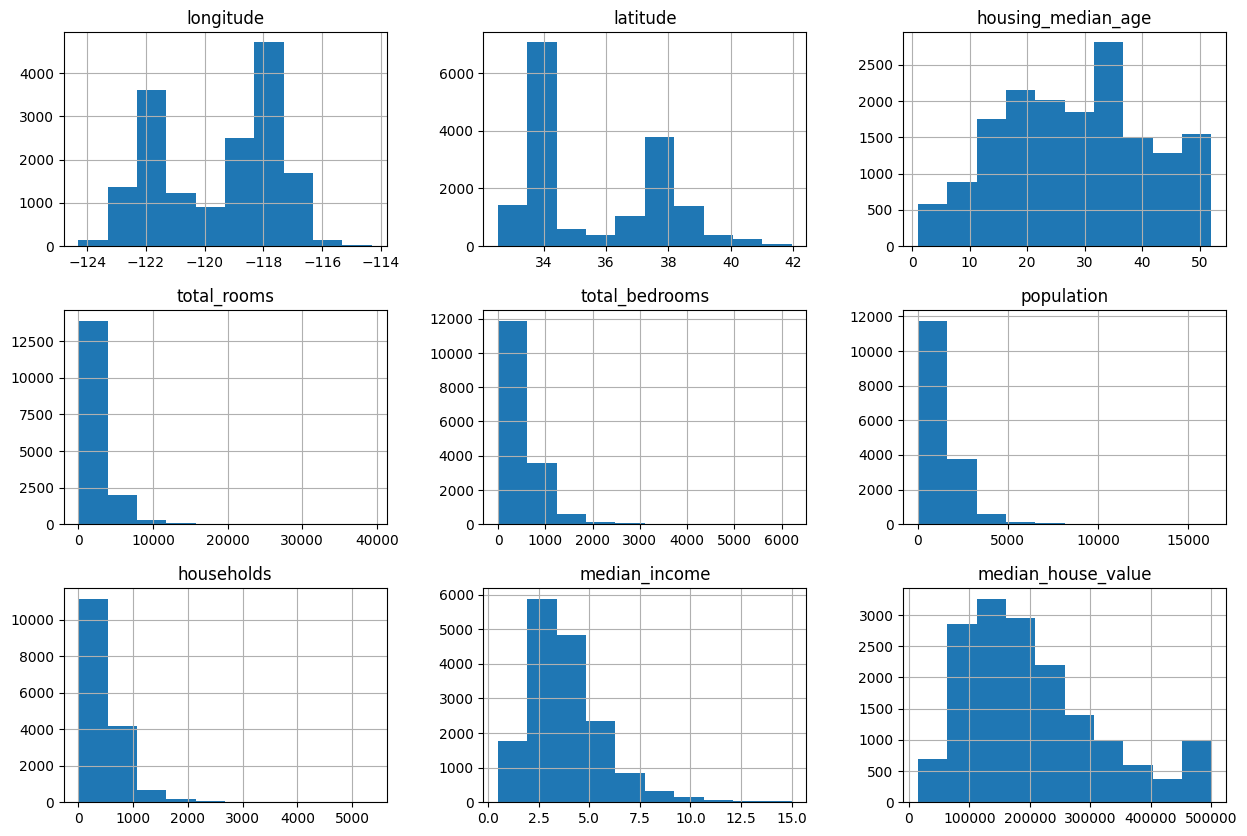

In [11]:
train_data.hist(figsize = (15, 10))

In [12]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923953,-0.111166,0.047599,0.070281,0.104333,0.058172,-0.016568,-0.049719
latitude,-0.923953,1.000000,0.013077,-0.037324,-0.066028,-0.112616,-0.072364,-0.079424,-0.141502
housing_median_age,-0.111166,0.013077,1.000000,-0.360486,-0.321030,-0.303998,-0.303952,-0.112925,0.105327
total_rooms,0.047599,-0.037324,-0.360486,1.000000,0.929464,0.867559,0.918651,0.199490,0.135319
total_bedrooms,0.070281,-0.066028,-0.321030,0.929464,1.000000,0.887927,0.980430,-0.007502,0.049282
population,0.104333,-0.112616,-0.303998,0.867559,0.887927,1.000000,0.916322,0.005261,-0.023482
households,0.058172,-0.072364,-0.303952,0.918651,0.980430,0.916322,1.000000,0.013870,0.064362
median_income,-0.016568,-0.079424,-0.112925,0.199490,-0.007502,0.005261,0.013870,1.000000,0.692683
median_house_value,-0.049719,-0.141502,0.105327,0.135319,0.049282,-0.023482,0.064362,0.692683,1.000000


<Axes: >

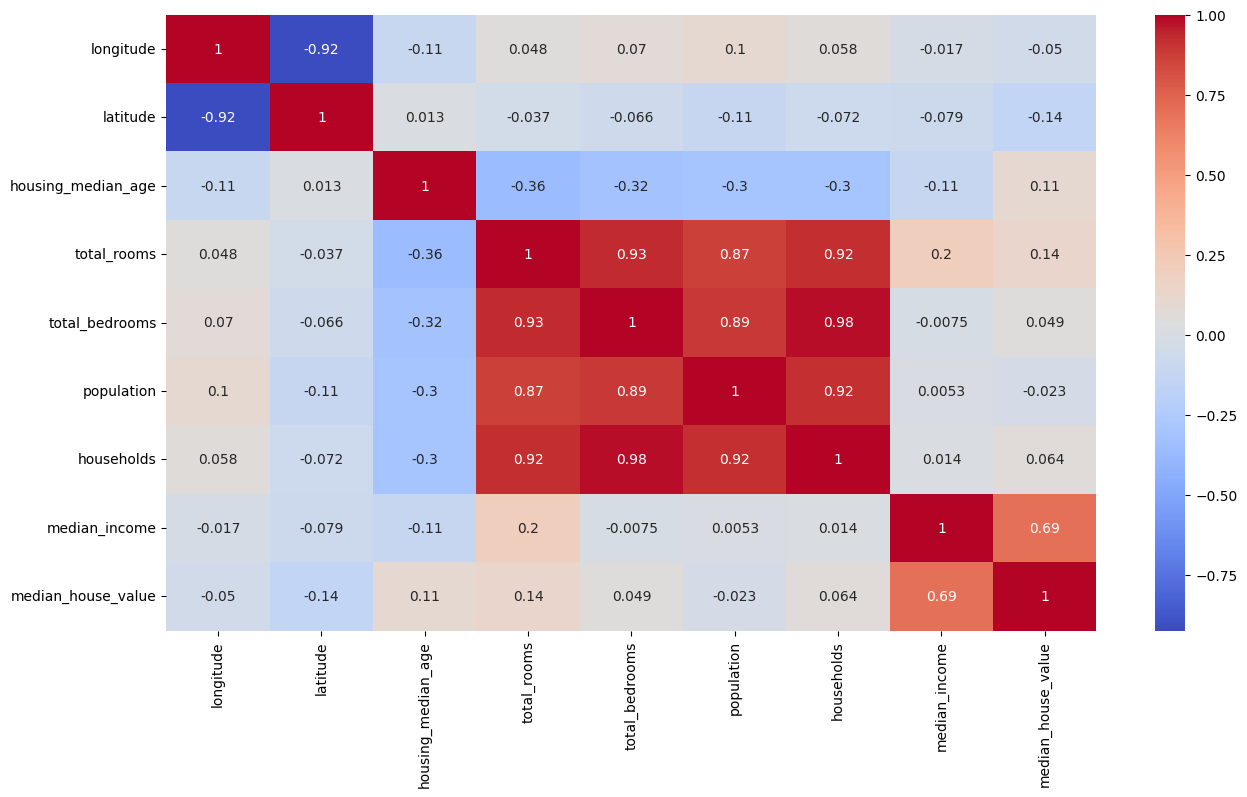

In [13]:
plt.figure(figsize=(15, 8))

sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

## Data Preprocessing

Pada tahap ini Kami melakukan transformasi logaritma `(dengan log1p)` pada kolom `total_rooms, total_bedrooms, population, dan households` guna mengatasi distribusi data yang miring.
Setelah transformasi, kami kembali membuat histogram untuk melihat perubahan distribusi data.

Untuk kolom kategorikal `ocean_proximity`, kami memeriksa nilai-nilai unik dan jumlah kemunculannya dengan `value_counts()`.
Kami kemudian melakukan one-hot encoding pada kolom tersebut menggunakan pd.`get_dummies()` dan menggabungkannya kembali ke `train_data`, lalu menghapus kolom aslinya.

Setelah one-hot encoding, kami menampilkan ulang `train_data` dan kembali memvisualisasikan matriks korelasi.
Kami juga membuat scatter plot dari kolom `latitude` dan `longitude`, yang diwarnai berdasarkan `median_house_value`, guna memahami distribusi harga rumah berdasarkan lokasi.


In [14]:
train_data['total_rooms'] = np.log1p(train_data['total_rooms'] * 1)
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'] * 1)
train_data['population'] = np.log1p(train_data['population'] * 1)
train_data['households'] = np.log1p(train_data['households'] * 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

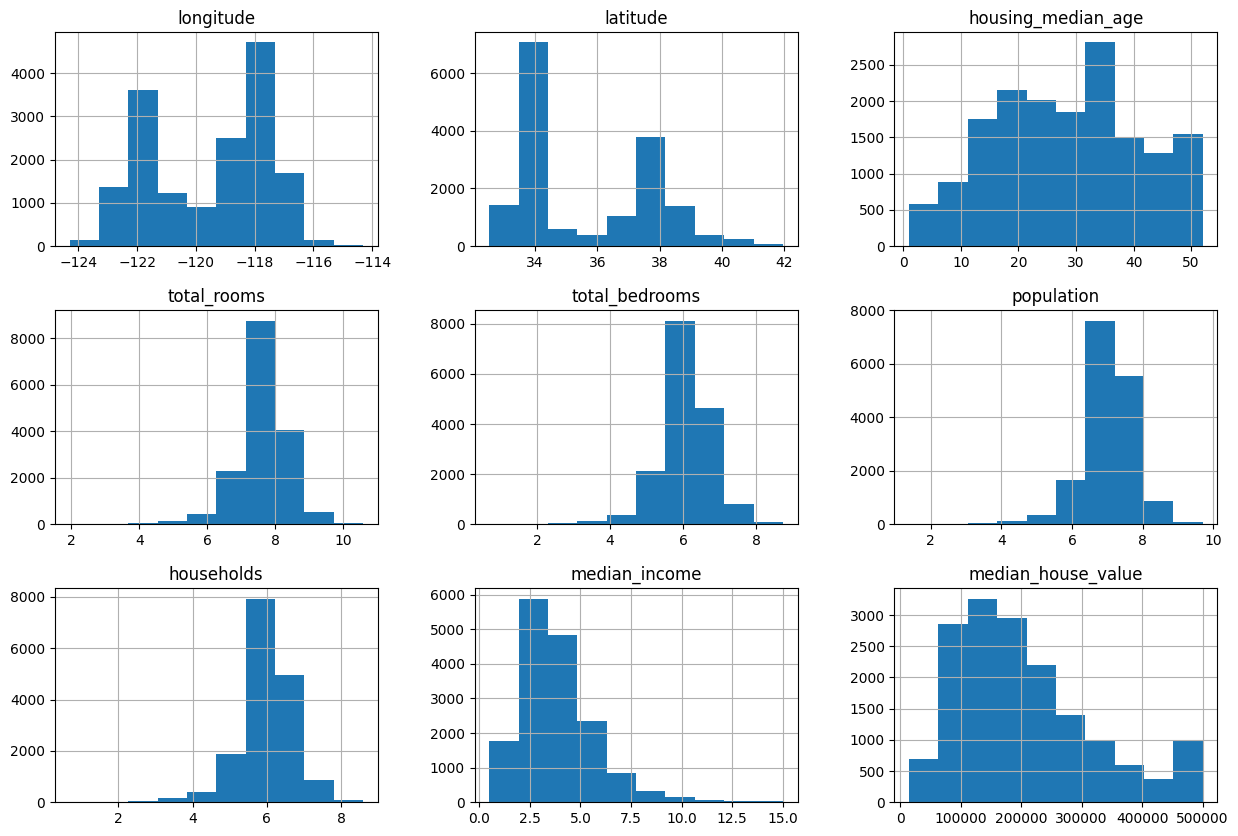

In [15]:
train_data.hist(figsize = (15, 10))

In [16]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7229
INLAND,5210
NEAR OCEAN,2093
NEAR BAY,1813
ISLAND,1


In [17]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
671,-122.16,37.70,36.0,7.001246,5.342334,6.343880,5.420535,2.9917,194600.0,False,False,False,True,False
3416,-118.41,34.29,32.0,7.372746,5.771441,7.506042,5.726848,4.2969,145800.0,True,False,False,False,False
5699,-118.26,34.24,42.0,6.792344,5.192957,6.320768,5.303305,4.4821,271900.0,True,False,False,False,False
9273,-122.58,38.15,9.0,7.172425,5.181784,6.526495,5.252273,7.5000,423200.0,True,False,False,False,False
8747,-118.35,33.82,28.0,8.934850,7.444833,8.137688,7.400010,4.0708,328900.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-121.81,39.70,21.0,8.527539,6.961296,7.989221,6.888572,1.5863,81300.0,False,True,False,False,False
20318,-119.15,34.20,25.0,8.144969,6.801283,8.623174,6.796824,3.0972,169300.0,False,False,False,False,True
12664,-121.45,38.49,34.0,8.181441,6.496775,7.340187,6.431331,3.5323,109800.0,False,True,False,False,False
15924,-122.44,37.72,52.0,7.482119,5.852202,7.005789,5.908083,4.3125,267200.0,False,False,False,True,False


<Axes: >

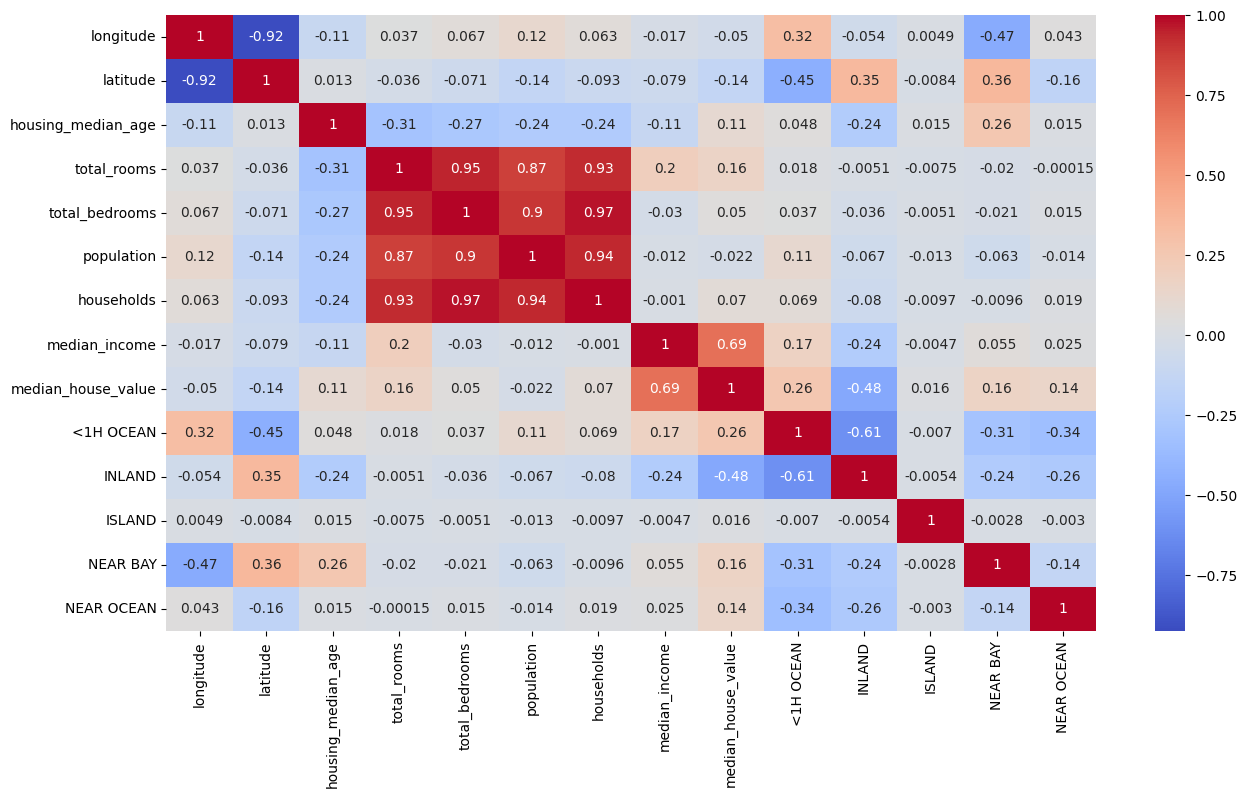

In [19]:
plt.figure(figsize=(15, 8))

sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

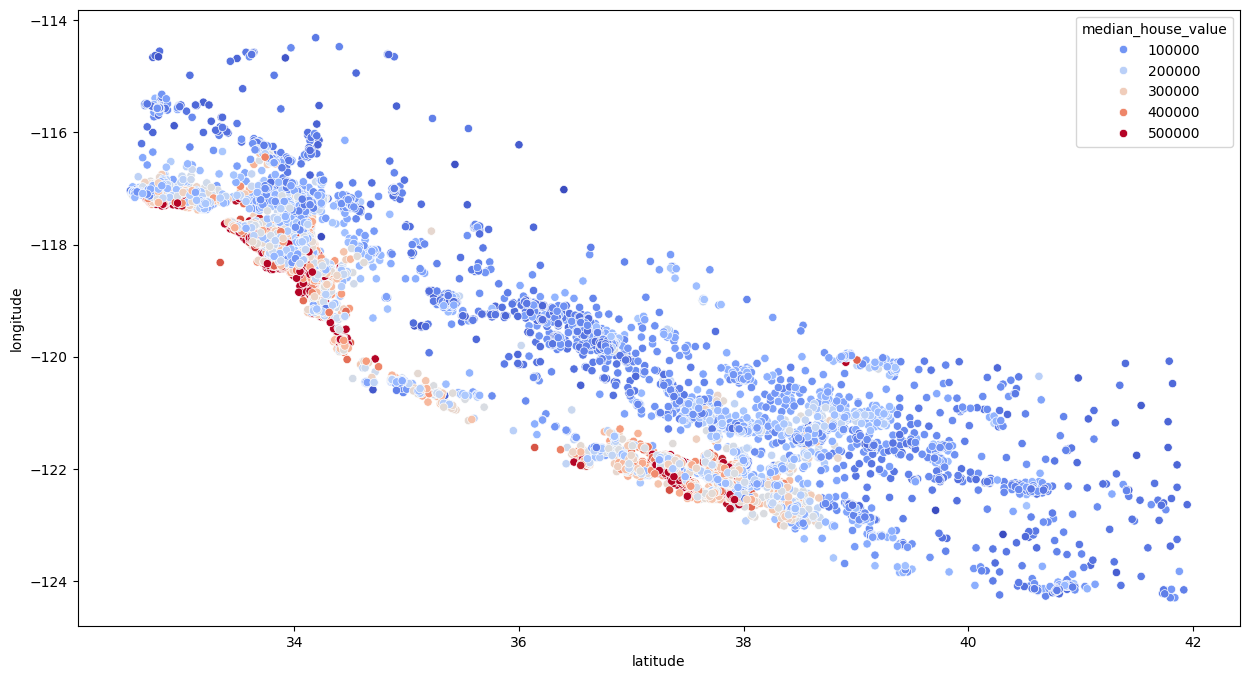

In [20]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x='latitude', y='longitude', hue='median_house_value', palette='coolwarm')

## Feature Engineering

Pada tahap ini Kami menambahkan dua fitur baru, yaitu `bedroom_ratio` (rasio jumlah kamar tidur terhadap total kamar) dan `household_rooms` (rasio total kamar terhadap jumlah ruangan).
Setelah penambahan fitur ini, kami memvisualisasikan kembali matriks korelasi untuk melihat pengaruhnya terhadap target.

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

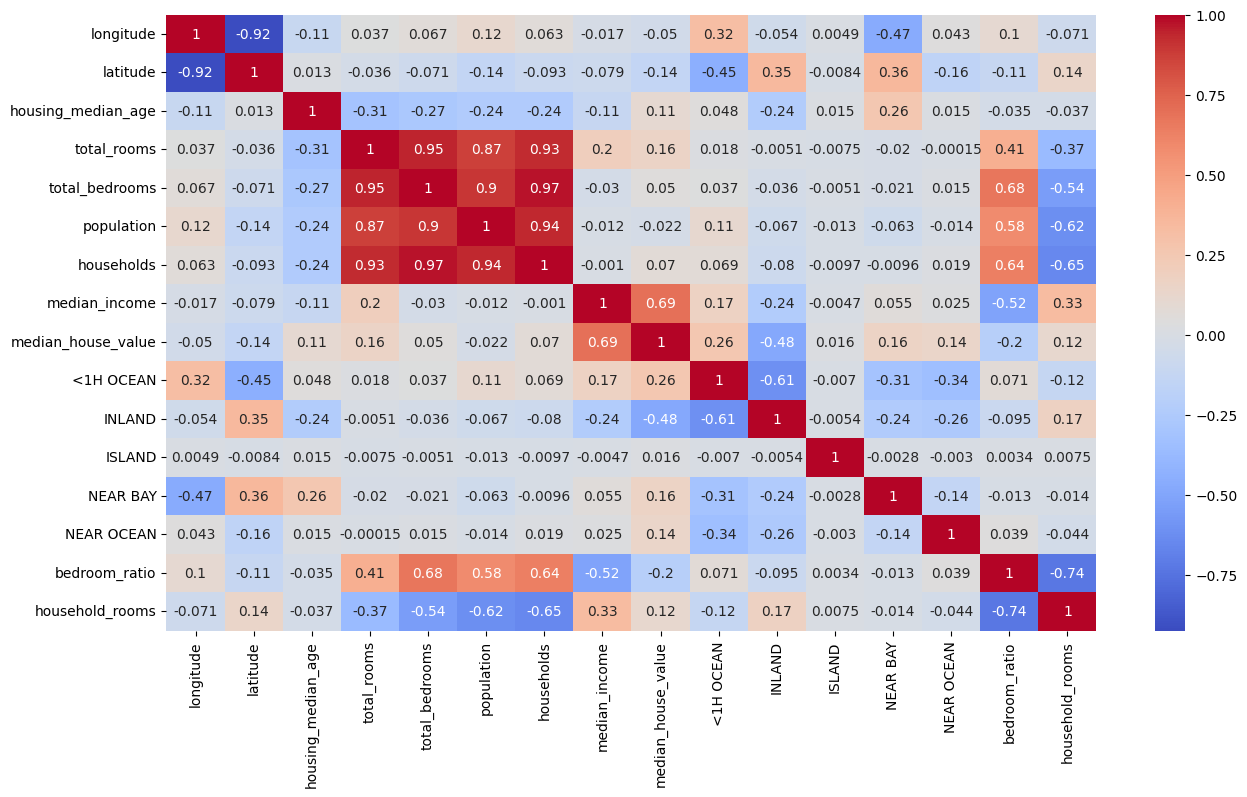

In [22]:
plt.figure(figsize=(15, 8))

sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Modelling

In [87]:
import warnings
warnings.filterwarnings('ignore')

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']
X_train_scaled = StandardScaler().fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
# preprocessing ulang untuk data test

test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log1p(test_data['total_rooms'] * 1)
test_data['total_bedrooms'] = np.log1p(test_data['total_bedrooms'] * 1)
test_data['population'] = np.log(test_data['population'] * 1)
test_data['households'] = np.log(test_data['households'] * 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [25]:
X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']
X_test_scaled = StandardScaler().fit_transform(X_test)

In [26]:
lr_score = reg.score(X_test_scaled, y_test)

In [27]:
lr_score

0.6595773218578811

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
forest_reg.score(X_test, y_test)

0.8148137119632227

In [30]:
rf_score = forest_reg.score(X_test, y_test)

## SVR

In [85]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1000, epsilon=0.1, gamma='scale')
svr_model.fit(X_train_scaled, y_train)

SVR(C=1000)

In [59]:
# Prediksi pada data test yang sudah diskalakan
y_pred_svr = svr_model.predict(X_test_scaled)

In [86]:
svr_score = svr_model.score(X_test_scaled, y_test)
svr_score

0.606601766739663

## KNN Regressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

knn_score = knn_model.score(X_test_scaled, y_test)
knn_score

0.7229080048729696

## Gradient Boosting Models

In [53]:
!pip install lightgbm xgboost catboost -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.9 MB/s eta 0:00:00


In [35]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

### LGBM

In [36]:
print("--- LightGBM Regressor ---")
lgbm_model = lgb.LGBMRegressor(random_state=42)

lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

lgbm_mse = mean_squared_error(y_test, y_pred_lgbm)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_r2 = lgbm_model.score(X_test, y_test)

print(f'Mean Squared Error (MSE): {lgbm_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {lgbm_rmse:.2f}')
print(f'R-squared (R2): {lgbm_r2:.2f}')

--- LightGBM Regressor ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2356
[LightGBM] [Info] Number of data points in the train set: 16346, number of used features: 14
[LightGBM] [Info] Start training from score 206931.271320
Mean Squared Error (MSE): 2261977393.49
Root Mean Squared Error (RMSE): 47560.25
R-squared (R2): 0.83


### Catboost Regressor

In [39]:
catboost_regressor = cb.CatBoostRegressor(iterations=100, # Jumlah iterasi/pohon
                                          learning_rate=0.1,
                                          loss_function='RMSE', # Loss function for regression
                                          random_state=42,
                                          verbose=0) # Set verbose=0 untuk menonaktifkan output pelatihan

catboost_regressor.fit(X_train, y_train)

y_pred_cb = catboost_regressor.predict(X_test)

cb_mse = mean_squared_error(y_test, y_pred_cb)
cb_rmse = np.sqrt(cb_mse)
cb_r2 = r2_score(y_test, y_pred_cb)

print(f'Mean Squared Error (MSE): {cb_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {cb_rmse:.2f}')
print(f'R-squared (R2): {cb_r2:.2f}')

Mean Squared Error (MSE): 2846177679.69
Root Mean Squared Error (RMSE): 53349.58
R-squared (R2): 0.78


### XGboost

In [51]:
print("--- XGBoost Regressor ---")
xgb_pipeline = xgb.XGBRegressor(
                                                         n_estimators=100, # Default number of trees
                                                             learning_rate=0.1,
                                                             random_state=42)

import re
current_columns1 = X_train.columns
column_mapping1 = {}
# Loop melalui nama kolom dan bersihkan
for col in current_columns1:
    # Ganti karakter yang tidak diizinkan dengan underscore
    new_col = re.sub(r'[\[\]<]', '_', col)
    column_mapping1[col] = new_col

current_columns2 = X_train.columns
column_mapping2 = {}
# Loop melalui nama kolom dan bersihkan
for col in current_columns2:
    # Ganti karakter yang tidak diizinkan dengan underscore
    new_col = re.sub(r'[\[\]<]', '_', col)
    column_mapping2[col] = new_col

# Ubah nama kolom di DataFrame menggunakan kamus pemetaan
X_train.rename(columns=column_mapping1, inplace=True)
X_test.rename(columns=column_mapping2, inplace=True)

--- XGBoost Regressor ---


In [53]:
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error (MSE): {xgb_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {xgb_rmse:.2f}')
print(f'R-squared (R2): {xgb_r2:.2f}')

Mean Squared Error (MSE): 2361341605.16
Root Mean Squared Error (RMSE): 48593.64
R-squared (R2): 0.82


# Visualisasi Komparasi Performa Model

Perbandingan Performa Model (Regresi):
------------------------------
Linear Regression : 0.6596
Random Forest : 0.8148
SVR : 0.6066
KNN : 0.7229
LGBM : 0.8291
Catboost : 0.7849
XGBoost : 0.8215
------------------------------


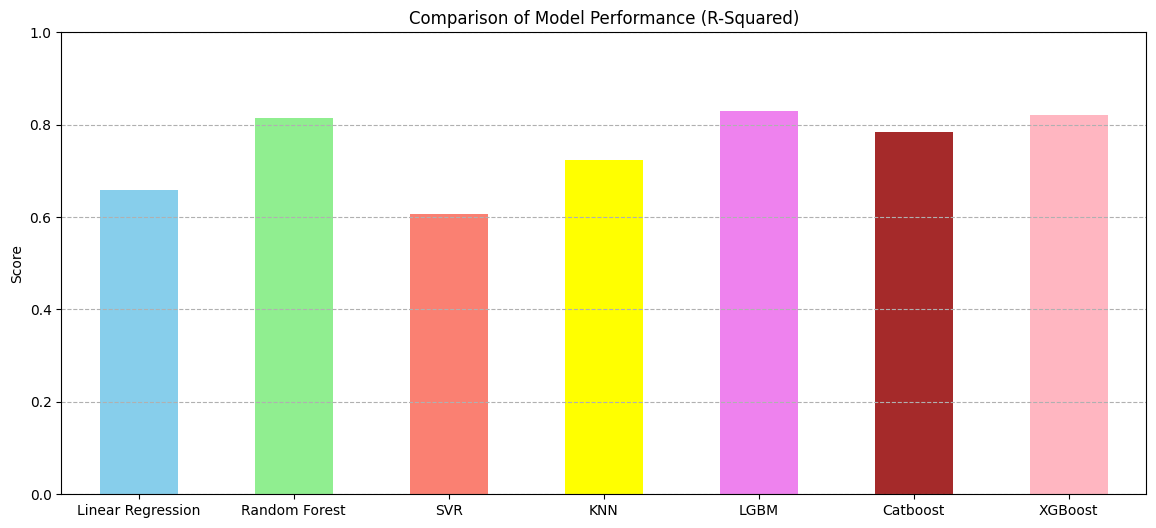


Visualisasi Perbandingan Performa Model:
         Nilai yang lebih tinggi umumnya menunjukkan performa yang lebih baik untuk metrik masing-masing.


In [88]:
print("Perbandingan Performa Model (Regresi):")
print("-" * 30)
print(f"Linear Regression : {lr_score:.4f}")
print(f"Random Forest : {rf_score:.4f}")
print(f"SVR : {svr_score:.4f}")
print(f"KNN : {knn_score:.4f}")
print(f"LGBM : {lgbm_r2:.4f}")
print(f"Catboost : {cb_r2:.4f}")
print(f"XGBoost : {xgb_r2:.4f}")
print("-" * 30)

model_metrics = {
    'Linear Regression': lr_score,
    'Random Forest': rf_score,
    'SVR': svr_score,
    'KNN': knn_score,
    'LGBM': lgbm_r2,
    'Catboost': cb_r2,
    'XGBoost': xgb_r2
}

model_metrics_series = pd.Series(model_metrics)

plt.figure(figsize=(14, 6))
model_metrics_series.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'yellow', 'violet', 'brown', 'lightpink'])
plt.title('Comparison of Model Performance (R-Squared)')
plt.ylabel('Score') # Label umum karena metrik berbeda
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

print("\nVisualisasi Perbandingan Performa Model:")

# Modelling with PCA

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

data = pd.read_csv('housing.csv')
data.dropna(inplace=True)

# 1. Pisahkan Fitur dan Target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# 2. Preprocessing Fitur Input
data['total_rooms'] = np.log1p(data['total_rooms'] * 1)
data['total_bedrooms'] = np.log1p(data['total_bedrooms'] * 1)
data['population'] = np.log1p(data['population'] * 1)
data['households'] = np.log1p(data['households'] * 1)

# feature engineering
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

# Identifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['ocean_proximity']

# Buat transformer untuk penskalaan numerik dan one-hot encoding kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 3. Terapkan PCA pada Fitur Input yang Sudah Dipreprocessing
# Buat pipeline yang menggabungkan preprocessing dan PCA
pca_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('pca', PCA(n_components=0.95)) # Pilih 95% varians
                               ])

# Fit dan transform data fitur
X_pca = pca_pipeline.fit_transform(X)

# 4. Bagi Data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Linear Regression

In [44]:
# Latih Model Regresi (Linear Regression)
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

# Evaluasi Model
y_pred = lr_pca.predict(X_test_pca)

# Evaluasi dengan metrik regresi
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {lr_mse:.2f}')
print(f'Root Mean Squared Error: {lr_rmse:.2f}')
print(f'R-squared: {lr_r2:.2f}')

Mean Squared Error: 5207929294.55
Root Mean Squared Error: 72165.98
R-squared: 0.62


### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_pca = RandomForestRegressor()

rf_pca.fit(X_train_pca, y_train)

# Evaluasi Model
y_pred = rf_pca.predict(X_test_pca)

# Evaluasi dengan metrik regresi
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {rf_mse:.2f}')
print(f'Root Mean Squared Error: {rf_rmse:.2f}')
print(f'R-squared: {rf_r2:.2f}')

Mean Squared Error: 3370359467.80
Root Mean Squared Error: 58054.80
R-squared: 0.75


### SVR

In [46]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=100, gamma=0.1)

svr_model.fit(X_train_pca, y_train)

y_pred_svr = svr_model.predict(X_test_pca)

svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, y_pred_svr)

print(f'Mean Squared Error: {svr_mse:.2f}')
print(f'Root Mean Squared Error: {svr_rmse:.2f}')
print(f'R-squared: {svr_r2:.2f}')

Mean Squared Error: 9119999390.74
Root Mean Squared Error: 95498.69
R-squared: 0.33


### KNN

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)

# 5. Latih Model KNN
knn_model.fit(X_train_pca, y_train)

y_pred_knn = knn_model.predict(X_test_pca)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, y_pred_knn)

print(f'Mean Squared Error: {knn_mse:.2f}')
print(f'Root Mean Squared Error: {knn_rmse:.2f}')
print(f'R-squared: {knn_r2:.2f}')

Mean Squared Error: 4566623416.38
Root Mean Squared Error: 67576.80
R-squared: 0.67
